In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
file_path = "./Alzheimer Disease and Healthy Aging Data In US.csv"
df = pd.read_csv(file_path, header=0)

C:\Users\w2306\AppData\Local\Temp\ipykernel_3692\2459081013.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)


In [3]:
# 数据摘要
df["Class"].value_counts() # 标称属性 选取Class频数

Overall Health                         71694
Screenings and Vaccines                46867
Nutrition/Physical Activity/Obesity    24851
Cognitive Decline                      19180
Caregiving                             18671
Mental Health                          16600
Smoking and Alcohol Use                16599
Name: Class, dtype: int64

In [4]:
df.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
Datasource                    object
Class                         object
Topic                         object
Question                      object
Data_Value_Unit               object
DataValueTypeID               object
Data_Value_Type               object
Data_Value                   float64
Data_Value_Alt               float64
Low_Confidence_Limit          object
High_Confidence_Limit         object
Sample_Size                  float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2       object
Stratification2               object
Geolocation                   object
ClassID                       object
TopicID                       object
QuestionID                    object
LocationID                     int64
StratificationCategoryID1     object
StratificationID1             object
S

In [5]:
nums = df["Data_Value"] # 数值属性 5数概括及缺失值的个数 选取Data_Value
nullnum = nums.isnull().sum()
nums = nums.dropna(axis = 0)
Minimum = min(nums)
Maximum = max(nums)
Q1 = np.percentile(nums, 25)
Median = np.median(nums)
Q3 = np.percentile(nums, 75)
print("缺失值个数：{}".format(nullnum))
print("最小值：{}".format(Minimum))
print("Q1：{}".format(Q1))
print("中位数：{}".format(Median))
print("Q3：{}".format(Q3))
print("最大值：{}".format(Maximum))

缺失值个数：69833
最小值：0.0
Q1：15.3
中位数：32.5
Q3：56.8
最大值：100.0


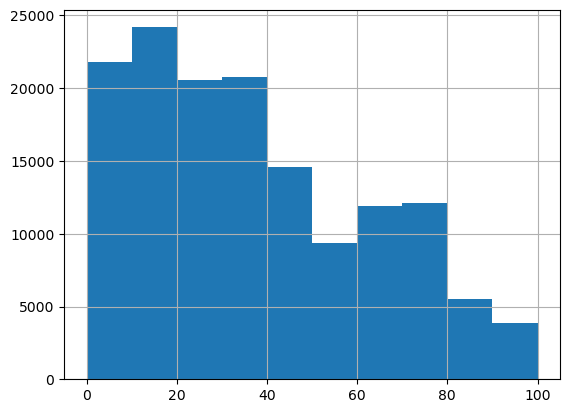

In [6]:
# 数据可视化
import matplotlib.pyplot as plt
hist = df["Data_Value"].hist() # 直方图

<Axes: >

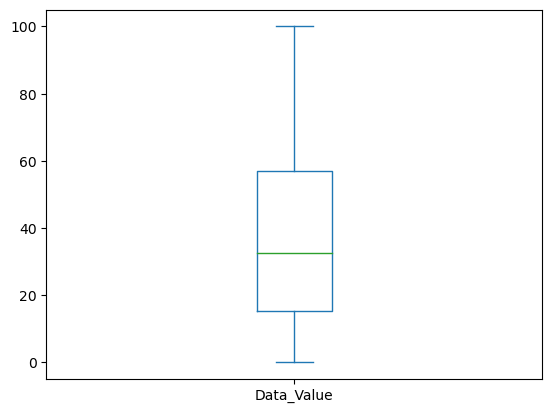

In [7]:
df["Data_Value"].plot.box() # 盒图及离群点

In [8]:
# 缺失值处理：剔除缺失值
data_dropna = df["Data_Value"].dropna(axis = 0)

<Axes: >

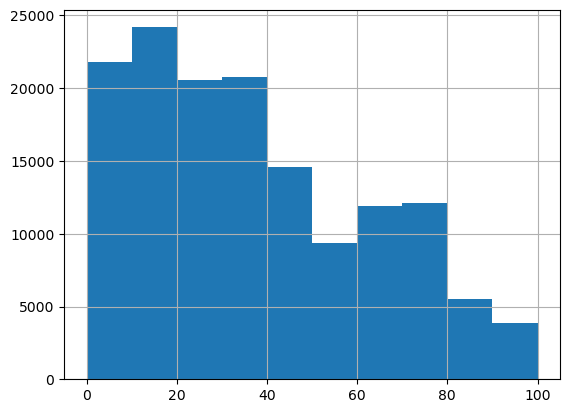

In [9]:
data_dropna.hist() # 直方图

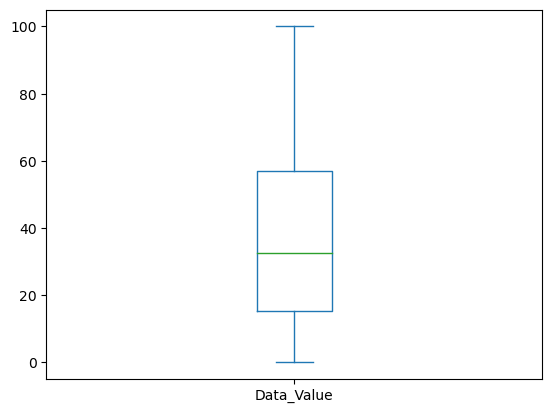

In [10]:
data_dropna.plot.box()
plt.show() # 盒图

<Axes: >

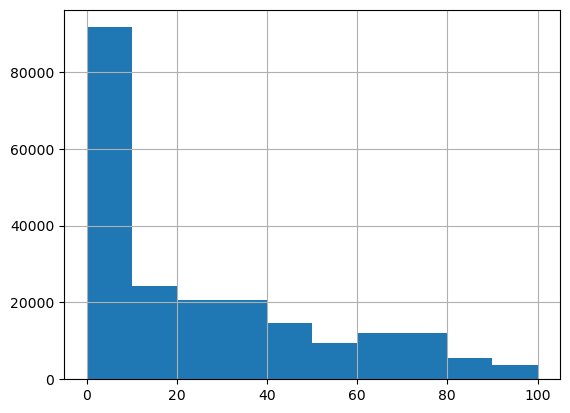

In [11]:
# 用最高频率值来填补缺失值
data_fillna=df["Data_Value"].fillna(df["Data_Value"].mode()[0])
data_fillna.hist() # 直方图

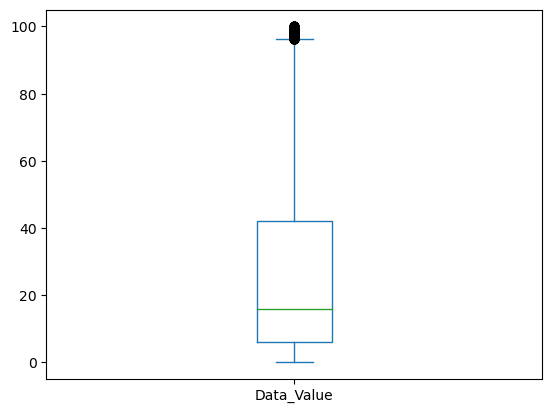

In [12]:
data_fillna.plot.box()
plt.show() # 盒图

In [13]:
df["Data_Value"].compare(data_fillna) #与原数据进行差异对比

,self,other
32,NaN,6.0
33,NaN,6.0
42,NaN,6.0
47,NaN,6.0
48,NaN,6.0
...,...,...
214456,NaN,6.0
214457,NaN,6.0
214458,NaN,6.0
214459,NaN,6.0


<Axes: >

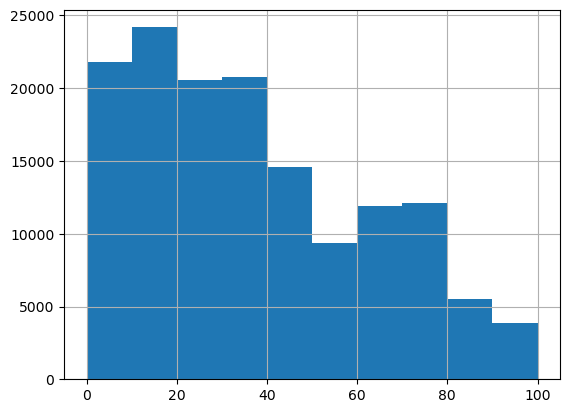

In [14]:
# 通过属性的相关关系来填补缺失值
data_fillna=df["Data_Value"].fillna(df["Data_Value_Alt"].corr(df["Data_Value"]) * df["Data_Value_Alt"]) 
data_fillna.hist() # 直方图

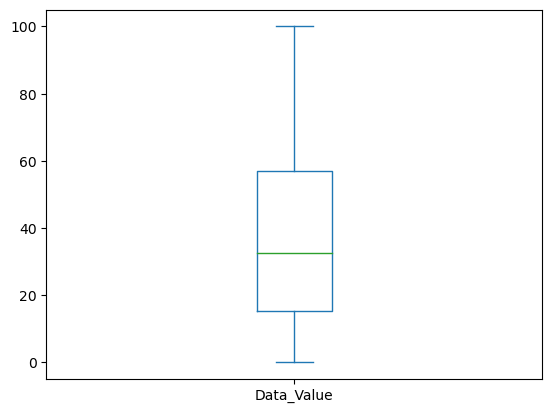

In [15]:
data_fillna.plot.box()
plt.show() # 盒图

In [16]:
df["Data_Value"].compare(data_fillna) #与原数据进行差异对比

,self,other


<Axes: >

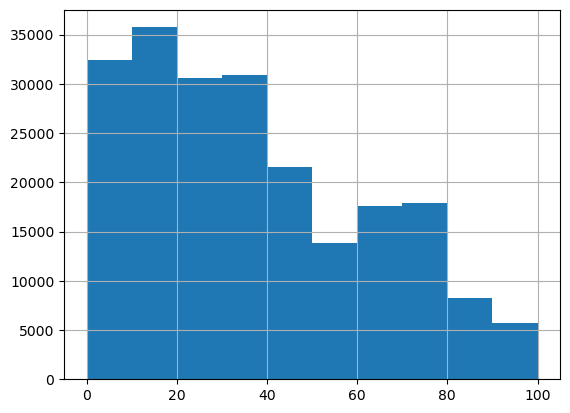

In [17]:
# 通过数据对象之间的相似性来填补缺失值
data_fillna=df["Data_Value"].interpolate(method='nearest') #采用最邻近线性插值
data_fillna.hist() # 直方图

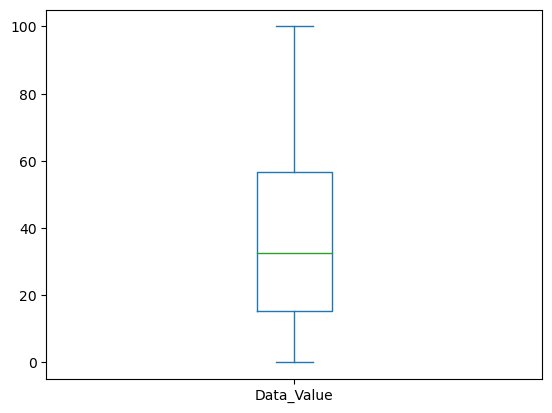

In [18]:
data_fillna.plot.box()
plt.show() # 盒图

In [19]:
df["Data_Value"].compare(data_fillna) #与原数据进行差异对比

,self,other
32,NaN,68.5
33,NaN,44.0
42,NaN,7.6
47,NaN,41.5
48,NaN,41.5
...,...,...
214453,NaN,80.4
214456,NaN,18.7
214457,NaN,18.7
214458,NaN,10.6
